Import essential libraries

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path1 = '/content/drive/MyDrive/logistic regression dataset/breast_cancer_modified.csv'
df1 = pd.read_csv(dataset_path1)

dataset_path2 = '/content/drive/MyDrive/logistic regression dataset/ionosphere_modified.csv'
df2 = pd.read_csv(dataset_path2)

In [13]:
df1_original = pd.read_csv(dataset_path1)

# Dataset Analysis

In [5]:
pd.set_option('display.max_columns', None)  # Set to None to display all columns

In [ ]:
def analyzeDataset(df):
    missing_values = df.isnull().sum()
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_values.plot.bar(ax=ax)
    for i, val in enumerate(missing_values):
        ax.text(i, val + 10, str(val), ha='center', fontweight='bold')

    plt.show()

In [ ]:
analyzeDataset(df1)

In [ ]:
analyzeDataset(df2)

In [8]:
df1.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df2.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Label
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Distribution of classes
print(df1['Diagnosis'].value_counts())
print(df2['Label'].value_counts())

B    357
M    212
Name: Diagnosis, dtype: int64
g    225
b    126
Name: Label, dtype: int64


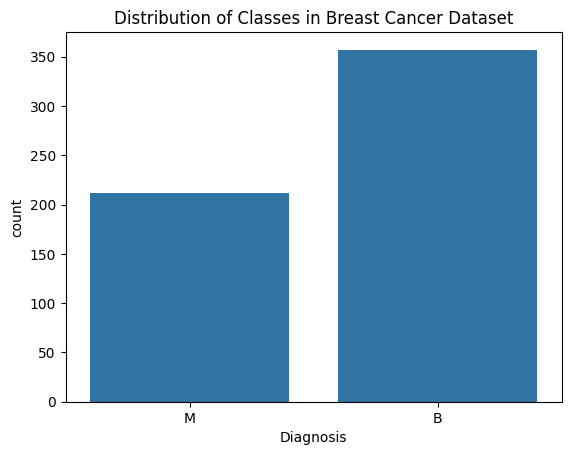

In [ ]:
# Class distribution for Breast Cancer dataset
sns.countplot(x='Diagnosis', data=df1)
plt.title('Distribution of Classes in Breast Cancer Dataset')
plt.show()

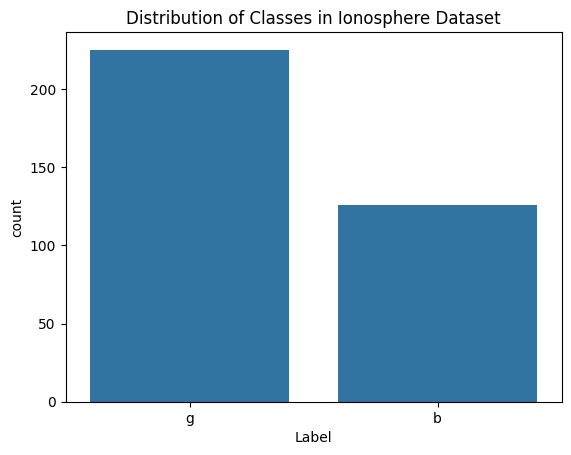

In [ ]:
# Class distribution for Ionosphere dataset
sns.countplot(x='Label', data=df2)
plt.title('Distribution of Classes in Ionosphere Dataset')
plt.show()

In [ ]:
# Feature distributions in Breast Cancer dataset
features_bc = df1.columns[1:]
for feature in features_bc:
    sns.histplot(df1[feature], kde=True)
    plt.title(f'Distribution of {feature} - Breast Cancer')
    plt.show()

In [ ]:
# Feature distributions in Ionosphere dataset
features_io = df2.columns[:]
for feature in features_io:
    sns.histplot(df2[feature], kde=True)
    plt.title(f'Distribution of {feature} - Ionosphere')
    plt.show()

In [7]:
df1 = df1.drop(columns=['ID'])

In [ ]:
def visualize_correlation_matrix(df, title):
    corr_matrix = df.corr()
    # Mask to hide upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Setting up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generating a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=False)  # Annotations are turned off for clarity
    plt.title(title)
    plt.show()

In [ ]:
visualize_correlation_matrix(df1, 'Full Correlation Matrix for Breast Cancer Dataset')

In [ ]:
visualize_correlation_matrix(df2, 'Full Correlation Matrix for Ionosphere Dataset')

# Preprocessing

Encode categorical variables

In [6]:
df1['Diagnosis'] = df1['Diagnosis'].map({'B': 1, 'M': 0})
df2['Label'] = df2['Label'].map({'g': 1, 'b': 0})

In [11]:
df1.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# select all features except the target
features_bc = df1.columns[:-1]
features_io = df2.columns[:-1]

# Then apply the manual standardization as shown before
for column in features_bc:
    df1[column] = (df1[column] - df1[column].mean()) / df1[column].std()

for column in features_io:
    df2[column] = (df2[column] - df2[column].mean()) / df2[column].std()

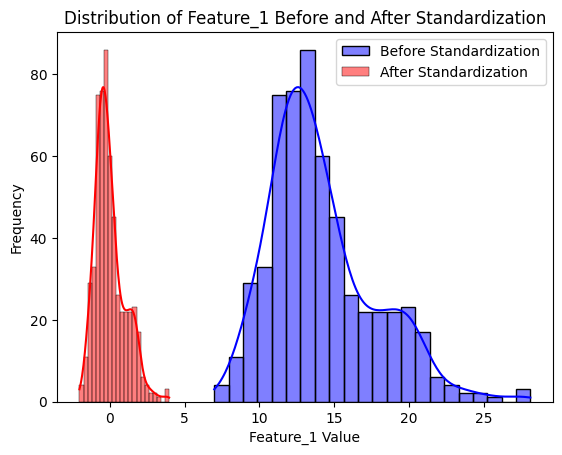

In [14]:
# Assuming 'feature1' is the feature you're interested in
feature = features_bc[0]  # This should be adjusted to your feature of interest's actual name

# Plot before standardization
sns.histplot(df1_original[feature], color="blue", label="Before Standardization", kde=True)

# Plot after standardization
sns.histplot(df1[feature], color="red", label="After Standardization", kde=True)

plt.legend()
plt.title(f'Distribution of {feature} Before and After Standardization')
plt.xlabel(f'{feature} Value')
plt.ylabel('Frequency')
plt.show()

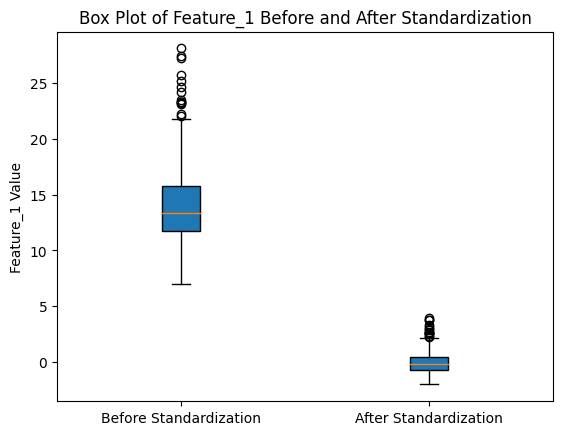

In [15]:
# Data for plotting
data_to_plot = [df1_original[feature], df1[feature]]

# Creating the box plot
plt.boxplot(data_to_plot, patch_artist=True, labels=['Before', 'After'])

plt.title(f'Box Plot of {feature} Before and After Standardization')
plt.ylabel(f'{feature} Value')
plt.xticks([1, 2], ['Before Standardization', 'After Standardization'])
plt.show()

In [17]:
def normalize_features(df, feature_names):
    for feature in feature_names:
        min_value = df[feature].min()
        max_value = df[feature].max()
        df[feature] = (df[feature] - min_value) / (max_value - min_value)

# Assuming features_bc and features_io are lists of your feature column names
normalize_features(df1, features_bc)
normalize_features(df2, features_io)

# Logistic Regression

In [20]:
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    # Concatenate X and y to shuffle them together
    full_dataset = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    np.random.shuffle(full_dataset)

    # Calculate the number of training examples
    train_size = int(full_dataset.shape[0] * (1 - test_size))

    # Split the dataset
    train, test = full_dataset[:train_size], full_dataset[train_size:]

    # Split back into X and y
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:, -1]

    return X_train, X_test, y_train, y_test


In [21]:
X = df1.drop('Diagnosis', axis=1).values
y = df1['Diagnosis'].values

# Now you can call the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print('X train shape : ', X_train.shape)
print('Y train shape : ', y_train.shape)
print('X test shape : ', X_test.shape)
print('Y test shape : ', y_test.shape)

X train shape :  (455, 30)
Y train shape :  (455,)
X test shape :  (114, 30)
Y test shape :  (114,)


In [25]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        predicted_classes = [1 if i > 0.5 else 0 for i in predictions]
        return np.array(predicted_classes)

In [26]:
# Example of instantiating and training the logistic regression model
model = LogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

In [28]:
def Accu_eval(y_true, y_pred):
    """
    Calculate the accuracy of the model.

    Parameters:
    - y_true: numpy.ndarray, the true labels.
    - y_pred: numpy.ndarray, the predicted labels by the model.

    Returns:
    - accuracy: float, the accuracy score of the model.
    """
    correct_predictions = (y_true == y_pred).sum()
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [29]:
# Assuming y_test are your true labels and predictions are what your model predicted
accuracy_score = Accu_eval(y_test, predictions)
print(f"Model Accuracy: {accuracy_score*100:.2f}%")

Model Accuracy: 85.09%


In [32]:
class KFoldCV:
    def __init__(self, model, k=10):
        self.model = model
        self.k = k
        self.scores = []

    def split(self, X, y):
        """Yield k equally sized splits of X and y using numpy arrays."""
        fold_size = len(X) // self.k
        indices = np.arange(len(X))
        np.random.shuffle(indices)

        for i in range(self.k):
            start = i * fold_size
            end = (i + 1) * fold_size if i != self.k - 1 else len(X)
            test_indices = indices[start:end]
            train_indices = np.concatenate([indices[:start], indices[end:]])

            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]
            yield X_train, X_test, y_train, y_test

    def fit_predict(self, X_train, X_test, y_train, y_test):
        self.model.fit(X_train, y_train)
        predictions = self.model.predict(X_test)
        return predictions

    def evaluate(self, y_true, y_pred):
        correct_predictions = (y_true == y_pred).sum()
        total_predictions = len(y_true)
        return correct_predictions / total_predictions

    def cross_validate(self, X, y):
        for X_train, X_test, y_train, y_test in self.split(X, y):
            y_pred = self.fit_predict(X_train, X_test, y_train, y_test)
            score = self.evaluate(y_test, y_pred)
            self.scores.append(score)
        return np.mean(self.scores), np.std(self.scores)


In [34]:
# Assuming LogisticRegression is your model class
model = LogisticRegression(learning_rate=0.01, iterations=1000)

X = df1.drop('Diagnosis', axis=1).values
y = df1['Diagnosis'].values

kf_cv = KFoldCV(model, k=10)
average_score, score_std = kf_cv.cross_validate(X, y)

print(f"Average Accuracy: {average_score*100:.2f}%")
# print(f"Standard Deviation of Accuracy: {score_std*100:.2f}%")

Average Accuracy: 89.66%
